In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Analysing Data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("drive/MyDrive/Data/1000_ml_jobs_us.csv")

In [4]:
data.head()

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [5]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
data.head()

,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_posted_date           997 non-null    object
 1   company_address_locality  950 non-null    object
 2   company_address_region    884 non-null    object
 3   company_name              997 non-null    object
 4   company_website           983 non-null    object
 5   company_description       985 non-null    object
 6   job_description_text      996 non-null    object
 7   seniority_level           988 non-null    object
 8   job_title                 997 non-null    object
dtypes: object(9)
memory usage: 70.2+ KB


## Handling Null data

In [8]:
### Trying to find region with the help of locality

In [9]:
localities_with_no_region_present = data[(data["company_address_region"].isna()) & (~data["company_address_locality"].isna())]

In [10]:
localities=set(localities_with_no_region_present["company_address_locality"])


In [11]:
locality_to_region_map = {}

for locality in localities:
  try:
    locality_to_region_map[locality] = data[(~data["company_address_region"].isna()) & (data["company_address_locality"]==locality.strip())].reset_index().loc[0]["company_address_region"]
  except:
    print(locality)
  #locality_to_region_map[locality] = data[(~data["company_address_region"].isna()) & (data["company_address_locality"]==locality)].loc[0]["company_address_region"]

Singapore
The Cloud
Provo, UT and Seattle, WA
Tokyo
VIENNA
Remote First
Hybrid-remote workplace
Biberach
San Francisco Bay Area
Everywhere
Worldwide


In [12]:
locality_to_region_map

{'Houston': 'TEXAS',
 'New York': 'New York',
 'Philadelphia': 'Pennsylvania',
 'Los Angeles ': 'California',
 'New York City': 'NY',
 'Palo Alto': 'CA',
 'London': 'United Kingdom',
 'San Francisco': 'California'}

In [13]:
### ["Worldwide","Everywhere","Remote First", "Hybrid-remote workplace"] all mapping to remote

In [14]:
remote = ["Worldwide","Everywhere","Remote First", "Hybrid-remote workplace"]
for locality in remote:
  locality_to_region_map[locality] = "Remote"

In [15]:
## Filling from Knowledge

locality_to_region_map["Provo, UT and Seattle, WA"] = "Washington"
locality_to_region_map["Tokyo"] = "Japan"
locality_to_region_map["San Francisco Bay Area"] = "California"
locality_to_region_map["Singapore"] = "Singapore"
locality_to_region_map["VIENNA"] = "Switzerland"

In [16]:
### replacing the null values from the map

data["company_address_region"] = data["company_address_region"].fillna(data["company_address_locality"].map(locality_to_region_map))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_posted_date           997 non-null    object
 1   company_address_locality  950 non-null    object
 2   company_address_region    945 non-null    object
 3   company_name              997 non-null    object
 4   company_website           983 non-null    object
 5   company_description       985 non-null    object
 6   job_description_text      996 non-null    object
 7   seniority_level           988 non-null    object
 8   job_title                 997 non-null    object
dtypes: object(9)
memory usage: 70.2+ KB


In [18]:
### Checking without locality

In [19]:
df_no_locality = data[(data["company_address_region"].isna())]

In [20]:
df_no_locality.head()

,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
34,2025-04-02,NaN,NaN,McKinsey & Company,http://www.mckinsey.com,McKinsey & Company is a global management cons...,"Who You'll Work WithAt McKinsey, our most valu...",Mid-Senior level,Machine Learning Engineer
47,2024-11-13,NaN,NaN,"Paradyme, a CATHEXIS Company",NaN,NaN,"OverviewParadyme, a CATHEXIS Company is a rapi...",Entry level,Data Scientist / ML Engineer
49,2023-11-29,NaN,NaN,Ritual,https://ritual.net,"Ritual is an open, sovereign execution layer f...","About RitualRitual is building a sovereign, ex...",Entry level,Machine Learning Engineer
60,2025-03-30,NaN,NaN,Samsung Semiconductor,https://semiconductor.samsung.com/,Established in 1974 as a subsidiary of Samsung...,Please NoteTo provide the best candidate exper...,Internship,"Intern, Machine Learning Engineer - VLMs"
67,2025-03-12,NaN,NaN,Trovo Health,www.trovohealth.com,Trovo Health uses an AI-powered platform backe...,"About UsHere at Trovo Health, we’re on a missi...",Not Applicable,AI/Machine Learning Engineer


In [21]:
### We will fill locality and region with "Not Provided"

In [22]:
data['company_address_locality'] = data['company_address_locality'].fillna("Not Provided")
data['company_address_region'] = data['company_address_region'].fillna("Not Provided")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_posted_date           997 non-null    object
 1   company_address_locality  997 non-null    object
 2   company_address_region    997 non-null    object
 3   company_name              997 non-null    object
 4   company_website           983 non-null    object
 5   company_description       985 non-null    object
 6   job_description_text      996 non-null    object
 7   seniority_level           988 non-null    object
 8   job_title                 997 non-null    object
dtypes: object(9)
memory usage: 70.2+ KB


In [24]:
### We will drop the companies with no website and company description as they might be fraduelent

In [25]:
data = data[~(data["company_website"].isna()) & ~(data["company_description"].isna())]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_posted_date           980 non-null    object
 1   company_address_locality  980 non-null    object
 2   company_address_region    980 non-null    object
 3   company_name              980 non-null    object
 4   company_website           980 non-null    object
 5   company_description       980 non-null    object
 6   job_description_text      979 non-null    object
 7   seniority_level           972 non-null    object
 8   job_title                 980 non-null    object
dtypes: object(9)
memory usage: 76.6+ KB


In [27]:
## We will drop the entry where job description not given

In [28]:
data = data[~(data["job_description_text"]).isna()]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_posted_date           979 non-null    object
 1   company_address_locality  979 non-null    object
 2   company_address_region    979 non-null    object
 3   company_name              979 non-null    object
 4   company_website           979 non-null    object
 5   company_description       979 non-null    object
 6   job_description_text      979 non-null    object
 7   seniority_level           972 non-null    object
 8   job_title                 979 non-null    object
dtypes: object(9)
memory usage: 76.5+ KB


In [30]:
data["seniority_level"] = data["seniority_level"].fillna("Any")

## Analyzing Dataset and Vizualization

In [170]:
data.head()

,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title,job_description_text_cleaned,metadata,text_search,embeddings
0,2024-10-31,indianapolis,indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...,overviewupper hand is embarking on an exciting...,"{'company_name': 'Upper Hand', 'company_websit...",Internship - Machine Learning Engineer & Data ...,"[-0.028326925, -0.024056708, 0.060569737, 0.03..."
1,2025-03-14,san francisco,california,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer,company descriptionthe ikigai platform unlocks...,"{'company_name': 'Ikigai', 'company_website': ...",Machine Learning Engineer:company descriptiont...,"[-0.11699305, -0.0013939041, 0.030496225, 0.00..."
2,2025-04-09,san jose,california,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer,our companychanging the world through digital ...,"{'company_name': 'Adobe', 'company_website': '...",Machine Learning Engineer:our companychanging ...,"[-0.086092934, -0.05930605, 0.056802552, -0.00..."
3,2025-03-22,mountain view,california,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training",waymo is an autonomous driving technology comp...,"{'company_name': 'Waymo', 'company_website': '...","Machine Learning Engineer, Training:waymo is a...","[-0.065901265, -0.09470626, 0.0027013463, 0.02..."
4,2025-03-28,boston,massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer,job title: machine learning engineerlocation: ...,"{'company_name': 'HMH', 'company_website': 'ht...",Machine Learning Engineer:job title: machine l...,"[-0.04153291, -0.023660898, 0.05666826, 0.0469..."


In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

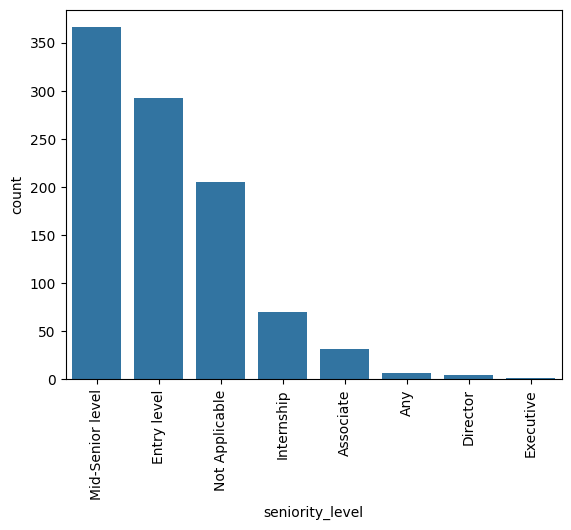

In [180]:
df_count_seniority_level = data["seniority_level"].value_counts().reset_index()
sns.barplot(df_count_seniority_level, x = "seniority_level", y = "count")
plt.xticks(rotation = 90)
plt.show()


In [181]:
### Mid seniority has maximum demand

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


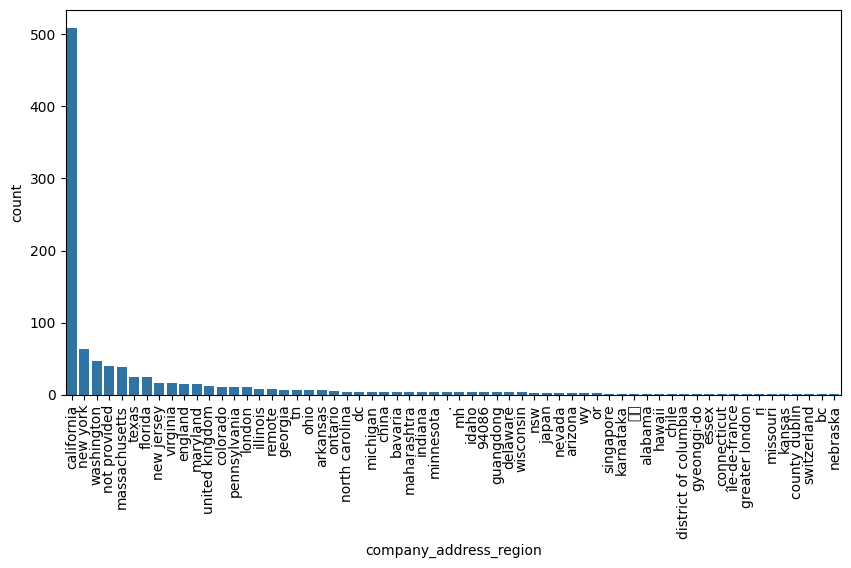

In [185]:
plt.figure(figsize = (10,5))
df_count_region_level = data["company_address_region"].value_counts().reset_index()
sns.barplot(df_count_region_level, x = "company_address_region", y = "count")
plt.xticks(rotation = 90)

plt.show()

In [186]:
### Carlifornia has a much higher demand

## Cleaning data

In [31]:
data.head()

,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [32]:
## As regions might be same but different Notations checking

In [33]:
data["company_address_region"] = data["company_address_region"].apply(lambda x: x.lower().strip().replace(r"^[a-z0-9]", ""))
data["company_address_locality"] = data["company_address_locality"].apply(lambda x: x.lower().strip().replace(r"^[a-z0-9]", ""))

In [34]:
regions= data["company_address_region"].tolist()

In [35]:
unique_regions= set(regions)

In [36]:
unique_regions

{'.',
 '94086',
 'al',
 'ar',
 'arizona',
 'arkansas',
 'bavaria',
 'bc',
 'ca',
 'california',
 'chile',
 'china',
 'co',
 'colorado',
 'connecticut',
 'county dublin',
 'dc',
 'delaware',
 'district of columbia',
 'england',
 'essex',
 'fl',
 'florida',
 'ga',
 'georgia',
 'greater london',
 'guangdong',
 'gyeonggi-do',
 'hawaii',
 'idaho',
 'il',
 'illinois',
 'indiana',
 'japan',
 'kansas',
 'karnataka',
 'london',
 'ma',
 'maharashtra',
 'maryland',
 'massachusetts',
 'md',
 'mh',
 'mi',
 'michigan',
 'minnesota',
 'missouri',
 'mn',
 'nc',
 'nebraska',
 'nevada',
 'new jersey',
 'new york',
 'nj',
 'north carolina',
 'not provided',
 'nsw',
 'ny',
 'oh',
 'ohio',
 'on',
 'ontario',
 'or',
 'pa',
 'pennsylvania',
 'remote',
 'ri',
 'singapore',
 'switzerland',
 'texas',
 'tn',
 'tx',
 'united kingdom',
 'va',
 'virginia',
 'wa',
 'washington',
 'wi',
 'wisconsin',
 'wy',
 'île-de-france',
 '北京'}

In [37]:
## need to correct regions

map_shorts_to_long= {
    "wi":'wisconsin',
    "wa":'washington',
    "va": 'virginia',
    "tx": 'texas',
    "on": 'ontario',
    "oh": 'ohio',
    "pa": 'pennsylvania',
    "ny": 'new york',
    "nc": 'north carolina',
    "nd": 'north dakota',
    "nm": 'new mexico',
    "ne": 'nebraska',
    "mi": 'michigan',
    "mo": 'missouri',
    "ma": 'massachusetts',
    "md": 'maryland',
    "me": 'maine',
    "mi": 'michigan',
    "mn": 'minnesota',
    "nj": 'new jersey',
    "nm": 'new mexico',
    "nv": 'nevada',
    "al": 'alabama',
    "ak": 'alaska',
    "az": 'arizona',
    "ar": 'arkansas',
    "ca": 'california',
    "co": 'colorado',
    "ct": 'connecticut',
    "ga": 'georgia',
    "hi": 'hawaii',
    "id": 'idaho',
    "il": 'illinois',
    "in": 'indiana',
    "ia": 'iowa',
    "ks": 'kansas',
    "ky": 'kentucky',
    "la": 'louisiana',
    "fl": 'florida',
}

In [38]:
data["company_address_region"] = data["company_address_region"].map(lambda x: map_shorts_to_long[x] if x in map_shorts_to_long.keys() else x)

In [39]:
localities= data["company_address_locality"].tolist()

In [40]:
unique_localities= set(localities)

In [41]:
unique_localities

{'.',
 'aldie',
 'alexandria',
 'ann arbor',
 'annapolis',
 'annapolis junction',
 'appleton',
 'arlington',
 'atlanta',
 'austin',
 'basking ridge',
 'beaverton',
 'bellevue',
 'bengaluru south',
 'bentonville',
 'bethesda',
 'biberach',
 'birmingham',
 'boise',
 'boston',
 'brentwood',
 'brighton',
 'bristol',
 'brooklyn',
 'broomfield',
 'burbank',
 'burlingame',
 'burnaby',
 'california',
 'camarillo',
 'cambridge',
 'canary wharf',
 'centennial',
 'chandler',
 'chantilly',
 'charlotte',
 'chicago',
 'china',
 'cincinnati',
 'colorado springs',
 'columbia',
 'columbus',
 'concord',
 'coppell',
 'corning',
 'costa mesa',
 'cupertino',
 'dallas',
 'dania beach',
 'danville',
 'dearborn',
 'deerfield',
 'denver',
 'dublin',
 'durham',
 'el segundo',
 'ellicott city',
 'everywhere',
 'falls church',
 'farmers branch',
 'foothill ranch',
 'fort lauderdale',
 'fort worth',
 'foster city',
 'fremont',
 'frisco',
 'guangzhou',
 'herndon',
 'honolulu',
 'hopkinton',
 'houston',
 'huntington

In [42]:
data.head()

,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,2024-10-31,indianapolis,indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,2025-03-14,san francisco,california,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2025-04-09,san jose,california,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,2025-03-22,mountain view,california,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,2025-03-28,boston,massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_posted_date           979 non-null    object
 1   company_address_locality  979 non-null    object
 2   company_address_region    979 non-null    object
 3   company_name              979 non-null    object
 4   company_website           979 non-null    object
 5   company_description       979 non-null    object
 6   job_description_text      979 non-null    object
 7   seniority_level           979 non-null    object
 8   job_title                 979 non-null    object
dtypes: object(9)
memory usage: 108.8+ KB


In [44]:
regions= data["company_address_region"].tolist()
unique_regions= set(regions)
unique_regions

{'.',
 '94086',
 'alabama',
 'arizona',
 'arkansas',
 'bavaria',
 'bc',
 'california',
 'chile',
 'china',
 'colorado',
 'connecticut',
 'county dublin',
 'dc',
 'delaware',
 'district of columbia',
 'england',
 'essex',
 'florida',
 'georgia',
 'greater london',
 'guangdong',
 'gyeonggi-do',
 'hawaii',
 'idaho',
 'illinois',
 'indiana',
 'japan',
 'kansas',
 'karnataka',
 'london',
 'maharashtra',
 'maryland',
 'massachusetts',
 'mh',
 'michigan',
 'minnesota',
 'missouri',
 'nebraska',
 'nevada',
 'new jersey',
 'new york',
 'north carolina',
 'not provided',
 'nsw',
 'ohio',
 'ontario',
 'or',
 'pennsylvania',
 'remote',
 'ri',
 'singapore',
 'switzerland',
 'texas',
 'tn',
 'united kingdom',
 'virginia',
 'washington',
 'wisconsin',
 'wy',
 'île-de-france',
 '北京'}

In [54]:
### analyzing job titles

job_titles = data["job_title"].tolist()

In [55]:
unique_titles = set(job_titles)

In [56]:
unique_titles

{'(General Hire) Machine Learning Engineer Graduate (Advertisement Team) - 2025 Start (BS/MS)',
 '(General Hire) Machine Learning Engineer Graduate (TikTok Recommendation) - 2025 Start (Master)',
 '(General Hire) Machine Learning Engineer Intern (Ads Interface) - 2025 Summer (BS/MS)',
 '(General Hire) Machine Learning Engineer, TikTok Recommendation',
 '2025 AI/ML Intern - Machine Learning Engineer',
 '2025 Intern - Machine Learning Engineer AI/ML',
 '2025 Intern CV/ML - Machine Learning Engineer',
 '2025 Machine Learning Engineer Intern',
 'A/AI Machine Learning Engineer Sr',
 'AI & Machine Learning Engineer',
 'AI / ML Engineer / Data Scientist',
 'AI / Machine Learning Engineer',
 'AI Engineer/Data Scientist (W2)',
 'AI Machine Learning Engineer',
 'AI Machine Learning Engineer - Personalization - SF',
 'AI Machine Learning Engineer PhD (Intern) United States',
 'AI Platform Software Engineer Intern',
 'AI Predictive Machine Learning Engineer',
 'AI Software Engineer',
 'AI Software

In [45]:
### Processing the job description

In [46]:
data["job_description_text"].tolist()[0]

'OverviewUpper Hand is embarking on an exciting journey to harness the power of machine learning, data science, and AI to enhance sports training and management, and we’re looking for an energetic and talented Machine Learning Engineer and Data Scientist to join our AI Data Science Team. As part of our team, you will be instrumental in building and deploying machine learning models while ensuring they align with real business use cases. You will also leverage your expertise in data science to develop data-driven insights and optimize AI-driven initiatives. This role is ideal for someone who thrives in a fast-paced, collaborative environment, loves solving real-world problems through machine learning, and has a passion for communication and presenting solutions.What You’ll DoBuild, deploy, and maintain scalable machine learning models that solve key business challenges.Work closely with external clients and internal cross-functional teams to translate business needs into machine learnin

In [47]:
import re
import string
def filter_and_clean(desc):
  desc = desc.lower()
  desc = desc.replace("  ", " ")
  desc_array = desc.split(" ")
  return " ".join(desc_array)

In [48]:
data["job_description_text_cleaned"] = data["job_description_text"].apply(filter_and_clean)

In [49]:
data["job_description_text_cleaned"].tolist()[0]

'overviewupper hand is embarking on an exciting journey to harness the power of machine learning, data science, and ai to enhance sports training and management, and we’re looking for an energetic and talented machine learning engineer and data scientist to join our ai data science team. as part of our team, you will be instrumental in building and deploying machine learning models while ensuring they align with real business use cases. you will also leverage your expertise in data science to develop data-driven insights and optimize ai-driven initiatives. this role is ideal for someone who thrives in a fast-paced, collaborative environment, loves solving real-world problems through machine learning, and has a passion for communication and presenting solutions.what you’ll dobuild, deploy, and maintain scalable machine learning models that solve key business challenges.work closely with external clients and internal cross-functional teams to translate business needs into machine learnin

## Preparing Database: Information Sources

In [50]:
### Using sentence transformers as we need sentence embeddings instead of word embeddings

In [51]:
!pip install sentence-transformers

In [52]:
## Installing a vector DB

In [56]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 9.5 MB/s eta 0:

In [50]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [51]:
import chromadb

chroma_db_path = "drive/MyDrive/Data/USMLJobs"

In [52]:
client = chromadb.PersistentClient(path=chroma_db_path)

In [57]:
data["metadata"] = data.apply(lambda x: {
    "company_name": x["company_name"],
    "company_website": x["company_website"],
    "company_description": x["company_description"],
    "company_address_region": x["company_address_region"],
    "company_address_locality": x["company_address_locality"],
    "seniority_level": x["seniority_level"],
    "job_description_text": x["job_description_text_cleaned"],
    "date_posted": x["job_posted_date"],
    "job_title": x["job_title"]
}, axis = 1)


In [58]:
### Creating search index function

def get_search_text(metadata):
  text = ""

  text += metadata["job_title"] + ":"
  text += metadata["job_description_text"] + ":"
  text += metadata["seniority_level"]

  if len(text) == 0:
    text = "No available description"

  return text

In [60]:
data["text_search"] = data["metadata"].apply(get_search_text)

In [61]:
data.head()

,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title,job_description_text_cleaned,metadata,text_search
0,2024-10-31,indianapolis,indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...,overviewupper hand is embarking on an exciting...,"{'company_name': 'Upper Hand', 'company_websit...",Internship - Machine Learning Engineer & Data ...
1,2025-03-14,san francisco,california,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer,company descriptionthe ikigai platform unlocks...,"{'company_name': 'Ikigai', 'company_website': ...",Machine Learning Engineer:company descriptiont...
2,2025-04-09,san jose,california,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer,our companychanging the world through digital ...,"{'company_name': 'Adobe', 'company_website': '...",Machine Learning Engineer:our companychanging ...
3,2025-03-22,mountain view,california,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training",waymo is an autonomous driving technology comp...,"{'company_name': 'Waymo', 'company_website': '...","Machine Learning Engineer, Training:waymo is a..."
4,2025-03-28,boston,massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer,job title: machine learning engineerlocation: ...,"{'company_name': 'HMH', 'company_website': 'ht...",Machine Learning Engineer:job title: machine l...


In [62]:
def generate_embeddings(text):

  embeddings = model.encode(text)

  return embeddings

In [64]:
data["embeddings"] = data["text_search"].apply(generate_embeddings)

In [65]:
data.to_csv("drive/MyDrive/Data/data_processed_MLJobs.csv", index = False)

## Setting up DB

In [66]:
collection = client.get_or_create_collection(name='Job_collection')

In [71]:
collection.add(
    embeddings = data['embeddings'].to_list(),
    documents = data['text_search'].to_list(),
    metadatas = data['metadata'].to_list(),
    ids = [str(i) for i in range(len(data))]
)

In [ ]:
### Testing

In [72]:
collection.get(
    ids = ['1','10'],
    include = ['embeddings', 'metadatas']
)

{'ids': ['1', '10'],
 'embeddings': array([[-1.16993047e-01, -1.39390409e-03,  3.04962248e-02,
          2.34597642e-03, -4.10370380e-02, -1.00869350e-01,
         -7.70791899e-03, -2.84389942e-03, -1.92047507e-02,
         -1.55710261e-02, -7.68978596e-02, -6.28884882e-02,
         -1.49536831e-03,  7.73527287e-03, -4.74106744e-02,
          5.49550690e-02, -1.87095790e-03, -5.86745329e-03,
         -1.20371059e-01, -1.08658090e-01,  8.58282950e-03,
         -4.47661430e-02, -8.79385136e-03, -5.49330935e-02,
         -3.12740989e-02,  7.31633678e-02,  4.80987318e-02,
         -3.25672068e-02,  3.69826215e-03, -4.02295142e-02,
         -1.85099300e-02, -5.47556542e-02,  1.67981088e-02,
          9.79821756e-03, -4.80103604e-02,  7.05245063e-02,
         -5.52475452e-02,  1.43247023e-02,  5.86673543e-02,
         -1.19008254e-02, -2.20145341e-02, -6.61570579e-02,
         -1.00867432e-02, -7.27912560e-02,  6.30108044e-02,
          1.71467126e-03, -6.82120910e-03, -1.15945630e-01,
     

## Creating Cache for searches

In [73]:
cache_collection_name = 'Cache'

In [74]:
cache_collection = client.get_or_create_collection(name=cache_collection_name)

## Semantic search

In [75]:
query = input("Please enter your query. You can specify requirements like seniority, technologies, and tech stack")

Please enter your query. You can specify requirements like seniority, technologies, and tech stackMid senior posts for Pyspark in California


In [76]:
query

'Mid senior posts for Pyspark in California'

In [77]:
cache_results = cache_collection.query(
    query_texts = [query],
    n_results = 2
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 77.9MiB/s]


In [78]:
## New no cache results
cache_results

{'ids': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[]],
 'distances': [[]]}

In [79]:
### Results from main collection


results = collection.query(
query_texts=query,
n_results=10
)
results.items()

dict_items([('ids', [['956', '603', '554', '920', '485', '937', '450', '241', '885', '970']]), ('embeddings', None), ('documents', [['Senior Software Engineer:we are seeking a talented and experienced senior software engineer to join our dynamic team in sunnyvale, ca. in this role, you will be responsible for designing, developing, and maintaining scalable systems while utilizing cutting-edge technologies. this is an onsite position, and we are looking for individuals who can bring strong technical expertise to the team.the ideal candidate is a self-motivated, multi-tasker, and demonstrated team-player. you will be a lead developer responsible for the development of new software products and enhancements to existing products. you should excel in working with large-scale applications and frameworks and have outstanding communication and leadership skills.key responsibilities:design and implement high-performance software solutionswork with big data technologies like hadoop and kafka to 

In [80]:
ids= results["ids"][0]
documents = results["documents"][0]
metadatas = results["metadatas"][0]

In [81]:
documents

['Senior Software Engineer:we are seeking a talented and experienced senior software engineer to join our dynamic team in sunnyvale, ca. in this role, you will be responsible for designing, developing, and maintaining scalable systems while utilizing cutting-edge technologies. this is an onsite position, and we are looking for individuals who can bring strong technical expertise to the team.the ideal candidate is a self-motivated, multi-tasker, and demonstrated team-player. you will be a lead developer responsible for the development of new software products and enhancements to existing products. you should excel in working with large-scale applications and frameworks and have outstanding communication and leadership skills.key responsibilities:design and implement high-performance software solutionswork with big data technologies like hadoop and kafka to build scalable systemsdevelop data pipelines and manage workflows with tools such as airflowcollaborate with cross-functional teams 

## Search Layer

In [96]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search

def combine_results(query):

  threshold = 0.2

  ids = []
  documents = []
  distances = []
  metadatas = []
  results_df = pd.DataFrame()

  # Check if the distance is greater than the threshold, if so, return results from the main collection
  if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
      # Query the collection against the user query and return the results
      results = collection.query(
          query_texts=query,
          n_results=5
      )

      # Store the query in cache_collection as a document with respect to ChromaDB for future reference
      # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
      Keys = []
      Values = []

      for key, val in results.items():
          if val is None:
              continue
          for i in range(len(val[0])):  # Iterate over the actual length of val
              Keys.append(str(key) + str(i))
              if len(val[0]) > i:  # Check if the current index exists in val
                  Values.append(str(val[0][i]))

      cache_collection.add(
          documents=[query],
          ids=[query],
          metadatas=dict(zip(Keys, Values))
      )

      # Print message indicating the results are found in the main collection
      print("Not found in cache. Found in the main collection.")

      # Construct a DataFrame from the query results
      result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs": results["ids"][0]}
      results_df = pd.DataFrame.from_dict(result_dict)


  # If the distance is less than the threshold, return results from the cache
  elif cache_results['distances'][0][0] <= threshold and cache_results['ids']:
      cache_result_dict = cache_results['metadatas'][0][0]

      # Loop through each inner list and then through the dictionary
      for key, value in cache_result_dict.items():
          if 'ids' in key:
              ids.append(value)
          elif 'documents' in key:
              documents.append(value)
          elif 'distances' in key:
              distances.append(value)
          elif 'metadatas' in key:
              metadatas.append(value)

      # Print message indicating the results are found in the cache
      print("Found in cache!")

      # Create a DataFrame from the cached results
      results_df = pd.DataFrame({
          'IDs': ids,
          'Documents': documents,
          'Distances': distances,
          'Metadatas': metadatas
      })
  else:
      # Print message indicating no valid results found in cache
      print("No valid results found in cache!")
  return results_df


In [136]:
query ="Mid senior posts for Pyspark in California"

In [137]:
results_df =combine_results(query)

Not found in cache. Found in the main collection.


In [138]:
results_df.head()

,Metadatas,Documents,Distances,IDs
0,"{'company_address_region': 'arkansas', 'job_ti...",Senior Software Engineer:we are seeking a tale...,1.309570,956
1,"{'date_posted': '2025-04-08', 'seniority_level...",Senior Machine Learning Engineer:senior roleth...,1.342785,603
2,"{'date_posted': '2025-03-28', 'company_website...",Data Scientist:company overview:one park finan...,1.353034,554
3,"{'company_address_locality': 'washington', 'co...",Senior Data Engineer - Visualization:company p...,1.378441,920
4,"{'company_website': 'https://unity.com/', 'com...","Senior Software Engineer, Data & ML Infrastruc...",1.431449,485


## Cross ranking and encoder

In [139]:
from sentence_transformers import CrossEncoder, util

In [140]:
## Cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

In [141]:
### Generating cross_encoder scores query

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

results_df['Reranked_scores'] = cross_rerank_scores

In [142]:
### Semantic

semantic = results_df.sort_values(by='Distances')
semantic[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'company_address_region': 'arkansas', 'job_ti...",Senior Software Engineer:we are seeking a tale...,1.309570,956,-6.273782
1,"{'date_posted': '2025-04-08', 'seniority_level...",Senior Machine Learning Engineer:senior roleth...,1.342785,603,-11.100100
2,"{'date_posted': '2025-03-28', 'company_website...",Data Scientist:company overview:one park finan...,1.353034,554,-11.249430


In [143]:

rank = results_df.sort_values(by='Reranked_scores',ascending=False)
rank[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'company_address_region': 'arkansas', 'job_ti...",Senior Software Engineer:we are seeking a tale...,1.309570,956,-6.273782
3,"{'company_address_locality': 'washington', 'co...",Senior Data Engineer - Visualization:company p...,1.378441,920,-10.641220
1,"{'date_posted': '2025-04-08', 'seniority_level...",Senior Machine Learning Engineer:senior roleth...,1.342785,603,-11.100100


In [144]:
final = rank[["Documents", "Metadatas", "IDs"]]

In [145]:
final

,Documents,Metadatas,IDs
0,Senior Software Engineer:we are seeking a tale...,"{'company_address_region': 'arkansas', 'job_ti...",956
3,Senior Data Engineer - Visualization:company p...,"{'company_address_locality': 'washington', 'co...",920
1,Senior Machine Learning Engineer:senior roleth...,"{'date_posted': '2025-04-08', 'seniority_level...",603
4,"Senior Software Engineer, Data & ML Infrastruc...","{'company_website': 'https://unity.com/', 'com...",485
2,Data Scientist:company overview:one park finan...,"{'date_posted': '2025-03-28', 'company_website...",554


## RAG Layer

In [146]:
!pip install openai

In [147]:
import openai

In [148]:
# Set the API key
with open("OpenAI-Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

In [158]:
def generate_response(query, final_df):

  role = "You are an AI assistant specialized in assisting people with accurate answers to queries in the Machine Learning jobs domain"

  task = f"""
        You recieve a query from the user in the Machine Learning job domain and you have to provide relevant information. The query is {query}
        ######
        Moreover, you have obtained the top relevant results from the dataset in the following dataframe: {final_df}

        Please utilise the metadata to provide related informations.
        """
  guidlines = f"""
              Please follow the given guidelines:
              1. Please provide accurate and relevant details.
              2. Please provide job descriptions that specify the technologies and roles to help the applicant chose
              3. Use the metadata to provide details like company name and location from metadatas under key company_name and company_address_region
              4. Please provide the company website from key company_website from metadata for guidance,
              5. Please Provide the opening seniority level.
              6. Please structure your answer properly and produce a concise response.
              """


  messages = [
      {
          "role": "system",
          "content": role
      },
      {
          "role": "user",
          "content": f"""{task}

                      ####

                     {guidlines}"""
      }
  ]
  response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

  # Returning response and p_ids
  return response.choices[0].message.content


In [159]:
# Generate the response
response = generate_response(query, final)

In [160]:
print(response)

Based on the metadata provided in the dataset, here are the details for mid-senior PySpark roles in California:

1. **Senior Software Engineer**  
   - Company: Not specified
   - Location: Arkansas
   - Seniority Level: Senior
   - Job Description: Seeking a talented individual with expertise in software engineering. 

2. **Senior Data Engineer - Visualization**  
   - Company: Not specified
   - Location: Washington
   - Seniority Level: Senior
   - Job Description: Data engineering role focusing on visualization technologies.

3. **Senior Machine Learning Engineer**  
   - Company: Not specified
   - Location: Not specified
   - Seniority Level: Senior
   - Job Description: Senior role involving machine learning engineering tasks.

4. **Senior Software Engineer, Data & ML Infrastructure**  
   - Company: Unity Technologies
   - Location: Not specified
   - Seniority Level: Senior
   - Company Website: [Unity Technologies](https://unity.com/)
   - Job Description: Software engineerin

In [161]:
query = "Beginner level Machine Learning Job preferably remote"

In [162]:
df_results = combine_results(query)

Not found in cache. Found in the main collection.


In [163]:

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

results_df['Reranked_scores'] = cross_rerank_scores

In [164]:
rank = results_df.sort_values(by='Reranked_scores', ascending=False)
rank[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
1,"{'date_posted': '2025-04-08', 'seniority_level...",Senior Machine Learning Engineer:senior roleth...,1.342785,603,-3.647897
4,"{'company_website': 'https://unity.com/', 'com...","Senior Software Engineer, Data & ML Infrastruc...",1.431449,485,-6.160806
2,"{'date_posted': '2025-03-28', 'company_website...",Data Scientist:company overview:one park finan...,1.353034,554,-9.207611


In [165]:
rank["Metadatas"][0]

{'company_address_region': 'arkansas',
 'job_title': 'Senior Software Engineer',
 'company_address_locality': 'bentonville',
 'company_name': 'Walmart',
 'company_description': 'Sixty years ago, Sam Walton started a single mom-and-pop shop and transformed it into the world’s biggest retailer. Since those founding days, one thing has remained consistent: our commitment to helping our customers save money so they can live better. Today, we’re reinventing the shopping experience and our associates are at the heart of it. When you join our Walmart family of brands, you’ll play a crucial role in shaping the future of retail, improving millions of lives around the world. \n\nWe are ecstatic to have been named a Great Place to Work® Certified May 2023 – May 2024, Disability: IN 2023 Best Places to Work, and Fast Company 100 Best Workplaces for Innovators 2023.\n\nThis is that place where your passions meet purpose. Join our family and build a career you’re proud of.',
 'date_posted': '2025-04

In [166]:
final = rank[["Documents", "Metadatas", "IDs"]]

In [167]:
# Generate the response
response = generate_response(query, final)

In [168]:
print(response)

Based on the provided dataset, here are some relevant details for a beginner-level Machine Learning job, preferably remote:

1. **Job Position**: Data Scientist
   - **Company**: One Park Financial
   - **Location**: Arkansas
   - **Company Website**: [One Park Financial](https://oneparkfinancial.com/)
   - **Seniority Level**: Entry level

2. **Job Position**: Senior Software Engineer
   - **Company**: Unity
   - **Location**: Washington
   - **Company Website**: [Unity](https://unity.com/)
   - **Seniority Level**: Senior

For a beginner in Machine Learning looking for remote positions, these job opportunities provide a good starting point to explore and apply for relevant roles.


In [168]:
## DONE ##